<a href="https://colab.research.google.com/github/omair22/EXPERIMENTS/blob/master/NMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# install nltk
!pip install nltk
# install gensim
!pip install gensim
# install spacy
!pip install spacy
!pip install plotly

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [17]:
df=pd.read_csv("kyoto_lexicon.csv",error_bad_lines=False)

b'Skipping line 2738: expected 3 fields, saw 4\nSkipping line 2787: expected 3 fields, saw 4\nSkipping line 2843: expected 3 fields, saw 4\nSkipping line 2850: expected 3 fields, saw 4\nSkipping line 2853: expected 3 fields, saw 4\nSkipping line 2894: expected 3 fields, saw 4\nSkipping line 3135: expected 3 fields, saw 4\nSkipping line 3179: expected 3 fields, saw 4\nSkipping line 3247: expected 3 fields, saw 4\nSkipping line 3312: expected 3 fields, saw 4\nSkipping line 3504: expected 3 fields, saw 4\n'


In [5]:
df.head()

,日本語,英語,Unnamed: 2
0,102世吉田日厚貫首,"the 102nd head priest, Nikko TOSHIDA",NaN
1,1月15日：成人祭、新年祭,"15th January: Seijin-sai (Adult Festival), the...",NaN
2,1月3日：家運隆盛、商売繁盛祈願祭,3rd January: Prayer Festival for the prosperit...,NaN
3,1月7日：七種粥神事,7th January: Nanakusa-gayu shinji (a divine se...,NaN
4,21世紀COEプログラム,The 21st Century Center Of Excellence Program,NaN


In [18]:
df=df.drop(['Unnamed: 2'], axis = 1) 
df.columns=['Japanese','English']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51971 entries, 0 to 51970
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Japanese  51971 non-null  object
 1   English   51971 non-null  object
dtypes: object(2)
memory usage: 812.2+ KB


In [16]:
nltk.download('punkt')

# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)
df['Japanese'] = df['Japanese'].apply(remove_punc)
df['English'] = df['English'].apply(remove_punc)

## **English Language Data Visualization**

In [ ]:
words = []
for i in df['English']:
  for word in i.split():
    words.append(word)
    
words

In [27]:
len(words)

163272

In [25]:
from collections import Counter
english_words_counts = Counter(words)
len(english_words_counts)

48049

In [ ]:
import operator
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)
english_words_counts

In [75]:
from collections import Counter
results = Counter()
df1['Japanese'].apply(results.update)
print(len(results))

30875


In [55]:
print("Number of words=",len(words))
print("Number of unique words=",len(english_words_counts))
print("Average Number of sentences in one sentence=",round(len(words)/len(df['English']),2))

Number of words= 163272
Number of unique words= 48049
Average Number of sentences in one sentence= 3.14


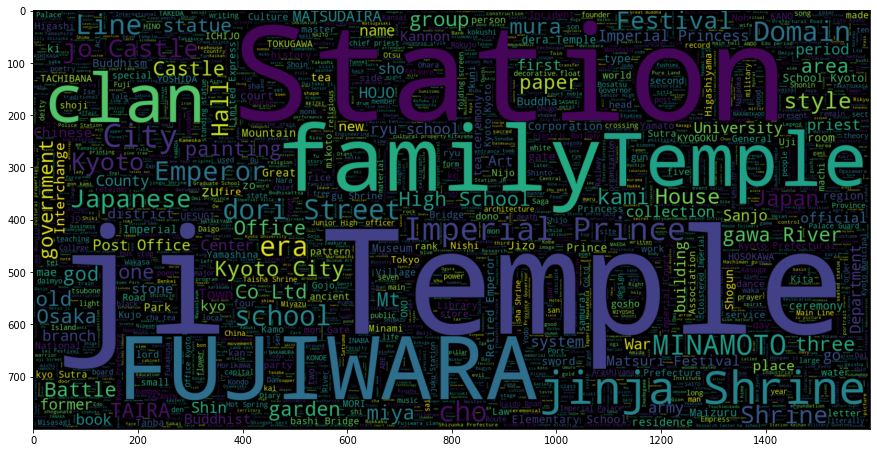

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (15,15)) 
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df.English))
plt.imshow(wc , interpolation = 'bilinear')

## **Japanese Language Data Visualization**

In [53]:
print("Number of words=",df1['len_tokens'].sum())
print("Number of unique words=",len(results))
print("Average Number of sentences in one sentence=",round(df1['len_tokens'].sum()/len(df['Japanese']),2))

Number of words= 142510
Number of unique words= 28573
Average Number of sentences in one sentence= 2.74


## **Building Tokens and padding**

In [34]:
maxlen_english = -1
for doc in df.English:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)

In [43]:
maxlen_jap = -1
for doc in df.Japanese:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_jap < len(tokens)):
        maxlen_jap = len(tokens)

In [39]:
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [40]:
def tokenize_and_pad(x, maxlen):
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [56]:
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.English, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.Japanese,  maxlen_english)

In [73]:
print("The tokenized version for sentence \n", df.English[-1:].item(),"\n", x_padded[-1:])

The tokenized version for sentence 
 Okami-jinja Shrine 
 [[1026   26   13    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]]


In [74]:
print("The tokenized version for sentence\n", df.Japanese[-1:].item(),"\n", y_padded[-1:])

The tokenized version for sentence
 龗神社 
 [[52271     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]]


In [53]:
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [58]:
pad_to_text(x_padded[0], x_tokenizer)

'the 102nd head priest nikko toshida                                             '

## **Splitting the data into training and testing data**

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.25)